#**Task-5 : Exploratory Data Analysis**      
  **INDIAN PREMIER LEAGUE** 
  
  *By Rajadurai Thamizhmani*

  **#GRIPDEC20**

**Tasks :**


1. As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team. 

2. Suggest teams or players a company should endorse for its products.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing the libraries

In [ ]:
# Impoting the required packages
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing.
import seaborn as sns
import random
import plotly.express as px
import matplotlib.pyplot as plt #For plotting

#Importing the datasets

In [ ]:
# Importing the CSV file
path ='/content/drive/My Drive/Colab Notebooks/datasets/Indianpremierleague/matches.csv'
delivery = pd.read_csv(path)

In [ ]:
path2 = '/content/drive/My Drive/Colab Notebooks/datasets/Indianpremierleague/deliveries.csv'
match = pd.read_csv(path2)

In [ ]:
delivery.info()
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
delivery.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


#Data Features

In [ ]:
delivery.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
match.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

#Checking null values

In [ ]:
delivery.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
match.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

#Data Preprocessing

**fill missing values**

In [ ]:
delivery['city'].fillna(delivery['venue'], inplace = True)
delivery['winner'].fillna(delivery['result'], inplace = True)
delivery['player_of_match'].fillna(delivery['result'], inplace = True)
delivery['umpire1'].fillna('unknown', inplace = True)
delivery['umpire2'].fillna('unknown', inplace = True)
delivery.drop('umpire3', axis=1, inplace=True)

In [ ]:
print(delivery['winner'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'no result' 'Rising Pune Supergiants'
 'Delhi Capitals']


**There is some repeated values as wel which is due to improper data cleaning which can be fixed.**

In [ ]:
delivery.replace('Bangalore','Bengaluru', inplace = True)
delivery.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
delivery.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
delivery.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
delivery.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

#Exploratory Data Analysis

**Total number of matches**

In [ ]:
delivery['id'].count()

756

**Total number of seasons**

In [ ]:
delivery['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

**Total number of matches every team played and their categories of Winning & Losss**

In [ ]:
team_wins = pd.DataFrame((team,delivery[(delivery['team1']==team)|(delivery['team2']==team)].shape[0],
                          delivery[delivery['winner']==team].shape[0]) for team in delivery['team1'].unique())
team_wins.columns = ['Team', 'Played_match', 'Wins_match']
team_wins = team_wins.sort_values(by='Played_match', ascending=False)

team_wins['loss_match'] = round(team_wins['Wins_match'] - team_wins['Played_match'])
team_wins['Win_percent'] = round(team_wins['Wins_match']*100 / team_wins['Played_match'],2)
team_wins

,Team,Played_match,Wins_match,loss_match,Win_percent
1,Mumbai Indians,187,109,-78,58.29
4,Royal Challengers Bangalore,180,84,-96,46.67
5,Kolkata Knight Riders,178,92,-86,51.69
7,Kings XI Punjab,176,82,-94,46.59
8,Chennai Super Kings,164,100,-64,60.98
6,Delhi Daredevils,161,67,-94,41.61
9,Rajasthan Royals,147,75,-72,51.02
0,Sunrisers Hyderabad,108,58,-50,53.70
10,Deccan Chargers,75,29,-46,38.67
12,Pune Warriors,46,12,-34,26.09


**Matches played in each season**

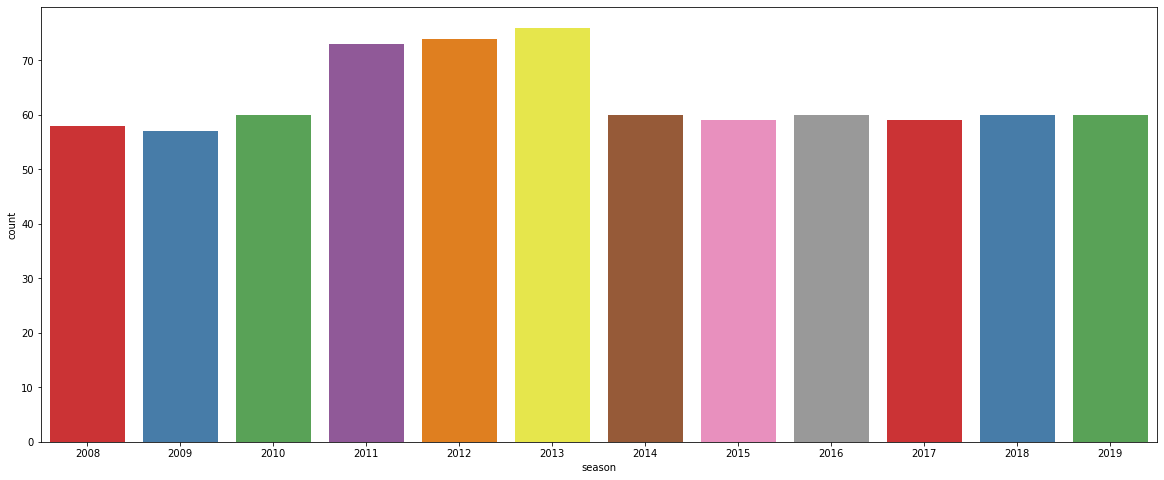

In [ ]:
fig_dims=(20,8)
plt.subplots(figsize=fig_dims)
sns.countplot(x=delivery['season'],data=delivery,palette='Set1')
plt.show()

**Cities(Venues) that hosted most number of IPL games**

In [ ]:
delivery['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai International Cricket Stadium', 'Mohali'], dtype=object)

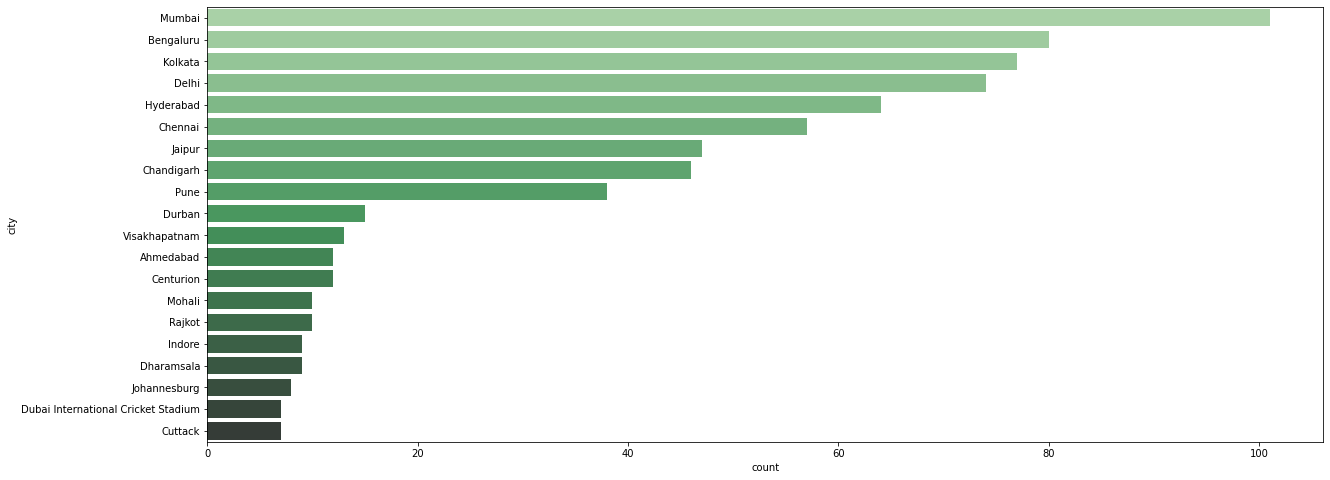

In [ ]:
fig_dims=(20,8)
plt.subplots(figsize=fig_dims)
sns.countplot(y="city", data=delivery, palette="Greens_d",
              order=delivery.city.value_counts().iloc[:20].index)

# Most succesfull Teams

**wins for each team in IPL history**

In [ ]:
delivery['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
no result                        4
Name: winner, dtype: int64

**Pie Chart for the percentage of winnings :**

In [ ]:
ar=delivery['winner'].value_counts().keys()
list1 = ar.tolist()

In [ ]:
ar2=delivery['winner'].value_counts()
list2 = ar2.tolist()

In [ ]:
px.pie(delivery,values=list2,names=list1,title='Percentage of wins', width=1100 , height=850)

**The most successful teams :**

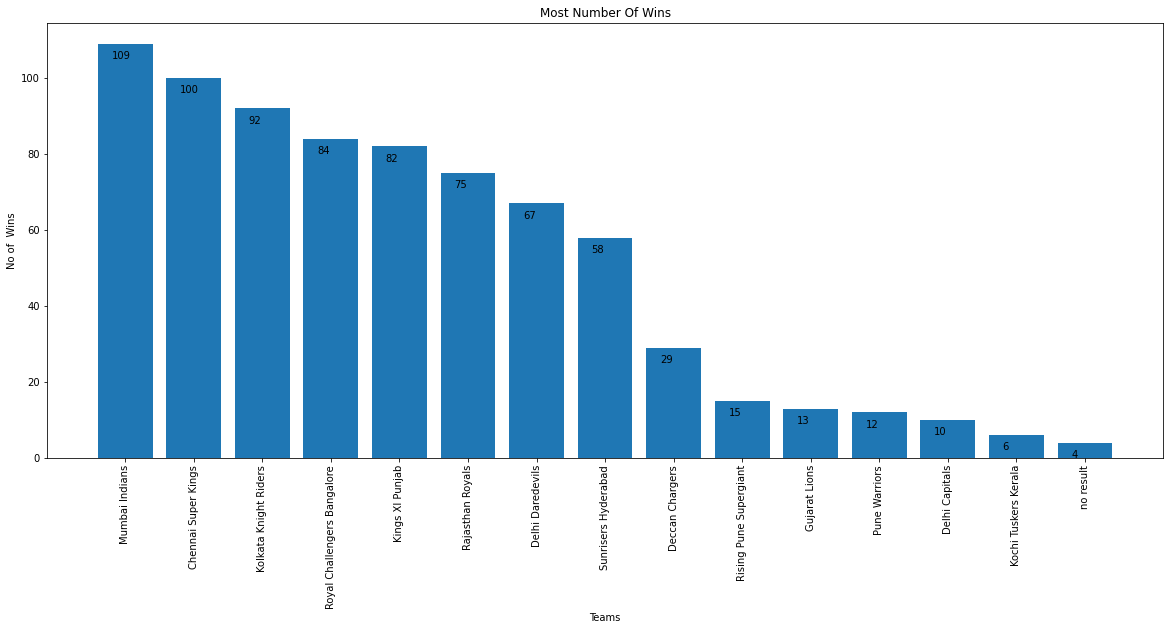

In [ ]:
most_no_of_wins = delivery.groupby('winner').apply(lambda x: x).reset_index()
most_no_of_wins = most_no_of_wins.groupby('winner').count()
most_no_of_wins = most_no_of_wins.city.reset_index(name='No_Of_Wins')
most_no_of_wins = most_no_of_wins.sort_values(by='No_Of_Wins',ascending=False)
fig_dims=(20,8)
plt.subplots(figsize=fig_dims)
plt.title("Most Number Of Wins")
plt.bar(most_no_of_wins.winner , most_no_of_wins.No_Of_Wins)
plt.xlabel("Teams")
plt.ylabel("No of  Wins")
count = 0
for i in most_no_of_wins.No_Of_Wins:
    plt.text(count-0.2,i-4,str(i))
    count+=1
plt.xticks(rotation = 90)
plt.yticks()
plt.show()

# Most successfull Players

**Top 15 players based on number of man of matches awarded :**


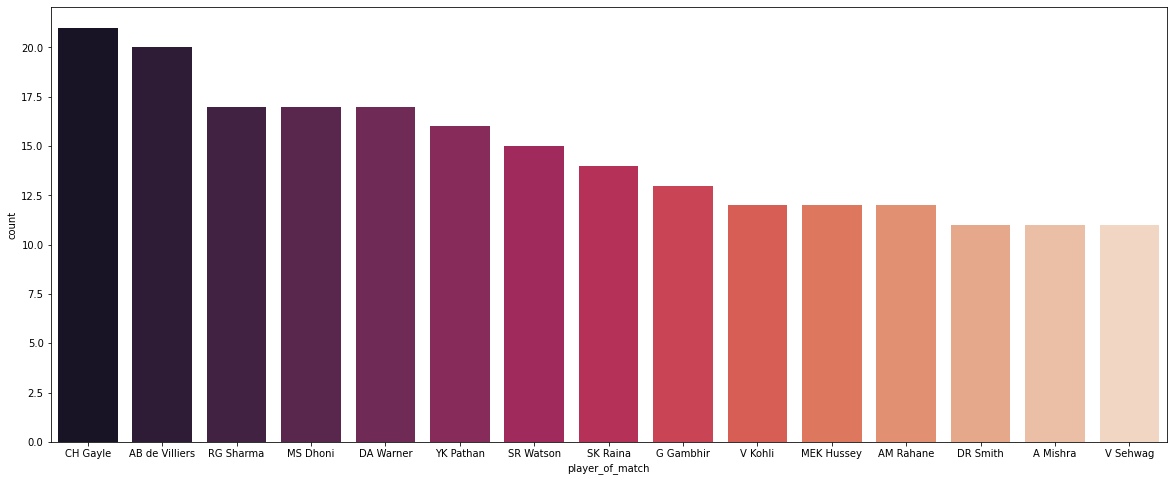

In [ ]:
fig_dims=(20,8)
plt.subplots(figsize=fig_dims)
sns.countplot(x="player_of_match", data=delivery, palette="rocket",
              order=delivery.player_of_match.value_counts().iloc[:15].index)
plt.show()

**The most successfull players of the match :**

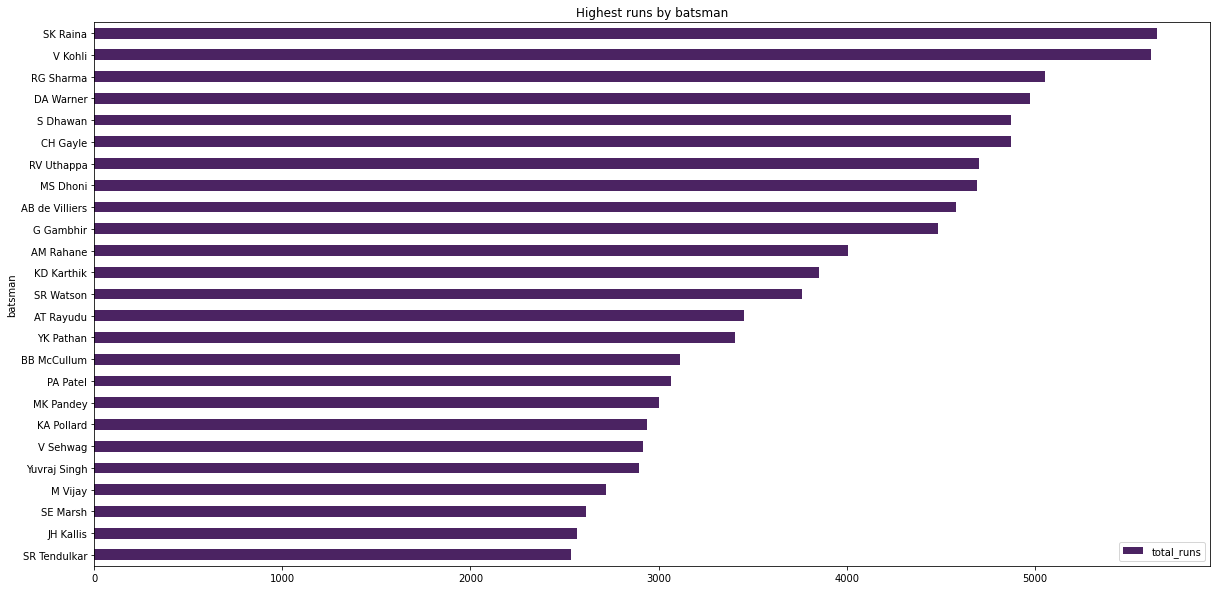

In [ ]:
df = match[['batsman', 'total_runs']].copy()
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')
df = df.drop_duplicates().sort_values('total_runs').tail(25).reset_index(drop=True)
fig = df.plot(kind='barh', x='batsman', y='total_runs', colormap='flare_r',title ='Highest runs by batsman',figsize = (20,10))
fig

**Top bowlers economy**

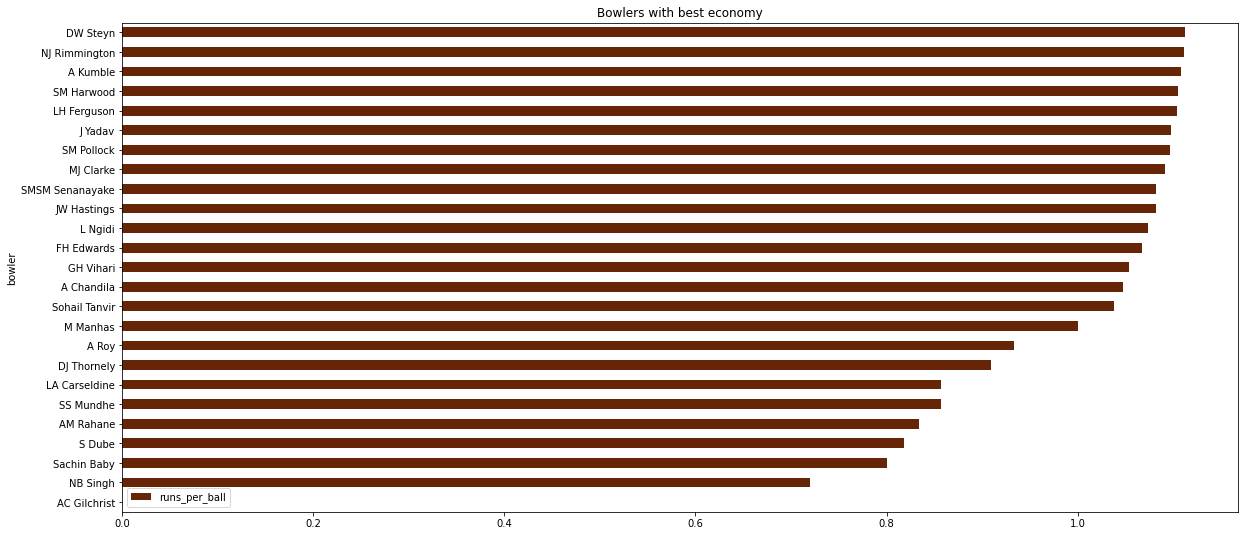

In [ ]:
df = match[['bowler', 'total_runs']].copy()
df['ball_count'] = df.groupby('bowler')['total_runs'].transform('count')
df['total_runs'] = df.groupby('bowler')['total_runs'].transform('sum')
df['runs_per_ball'] = df['total_runs'] / df['ball_count']
df = df.drop_duplicates().reset_index(drop=True).sort_values('runs_per_ball').head(25)
fig = df.plot(kind='barh', x='bowler', y='runs_per_ball', colormap= 'YlOrBr_r', title ='Bowlers with best economy',figsize = (20,9))
fig

# Factors contributing win or loss of a team

**lets compare the Toss Decisions**

In [ ]:
tdc = delivery.groupby('toss_decision').apply(lambda x : x).reset_index()
tdc = tdc.groupby('toss_decision').count() 
tdc = tdc.city.reset_index(name='Values')
print(tdc)

  toss_decision  Values
0           bat     293
1         field     463


**Plotting the Toss Decisions**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



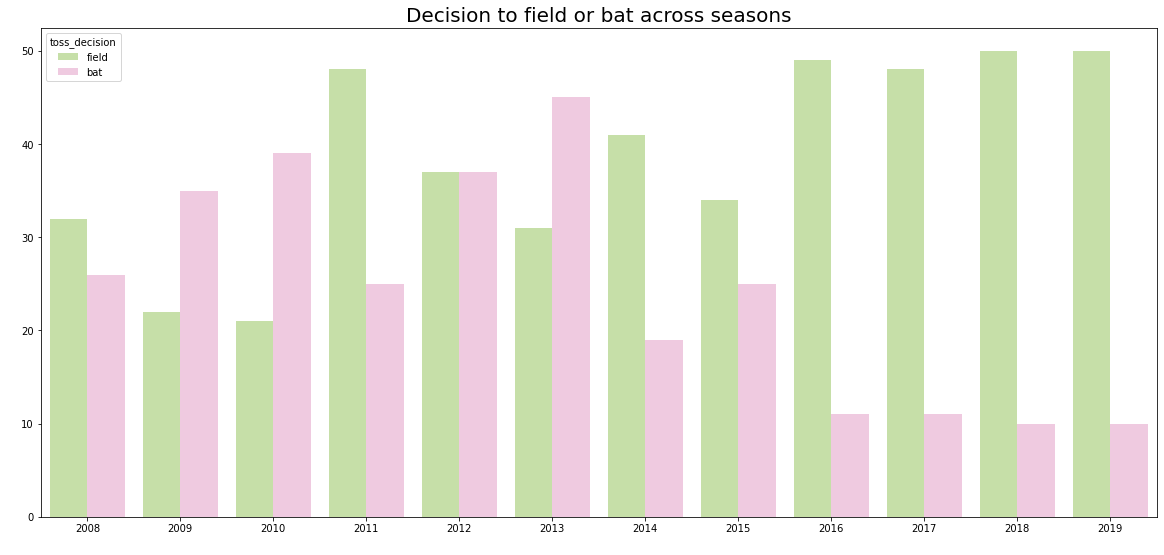

In [ ]:
fig_dims=(20,9)
plt.subplots(figsize=fig_dims)
sns.countplot(delivery['season'].sort_values(), hue = delivery['toss_decision'], palette = 'PiYG_r')
plt.title("Decision to field or bat across seasons", fontsize = 20)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

**Finding out stadium wise most "WIN BY RUNS" AND "WIN BY WICKETS"**

**Stadium wise "WIN BY RUNS"**


In [ ]:
max_win_by_runs= []
eachvenue = delivery['venue'].unique()
for i in eachvenue :
    temp_each_venue = delivery.loc[delivery["venue"]==i,["venue","win_by_runs"]]
    temp_max_win_by_runs = temp_each_venue["win_by_runs"].max()
    max_win_by_runs.append(temp_max_win_by_runs)

win_by_runs = pd.DataFrame({"venue" : eachvenue,"max win by runs" : max_win_by_runs}, columns = ["venue", "max win by runs"]).set_index("venue")

**Stadium wise "WIN BY WICKETS"**

In [ ]:
max_win_by_wickets = []
eachvenue = delivery["venue"].unique()
for i in eachvenue :
    temp_each_venue = delivery.loc[delivery["venue"]==i,["venue","win_by_wickets"]]
    temp_max_win_by_wickets = temp_each_venue["win_by_wickets"].max()
    max_win_by_wickets.append(temp_max_win_by_wickets)

win_by_wickets = pd.DataFrame({"venue" : eachvenue,"max win by wickets" : max_win_by_wickets}, columns = ["venue", "max win by wickets"]).set_index("venue")

**Merging both the dataframes**

In [ ]:
combined_each_venue = pd.merge(win_by_runs,win_by_wickets, how="outer", left_index=True, right_index=True)
combined_each_venue

,max win by runs,max win by wickets
venue,,
Rajiv Gandhi International Stadium,118,9
Maharashtra Cricket Association Stadium,97,9
Saurashtra Cricket Association Stadium,26,10
Holkar Cricket Stadium,31,10
M. Chinnaswamy Stadium,144,10
Wankhede Stadium,105,10
Eden Gardens,102,9
Feroz Shah Kotla,146,10
Punjab Cricket Association Stadium,76,10


**Bar plotting for WIN-BY-RUNS**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



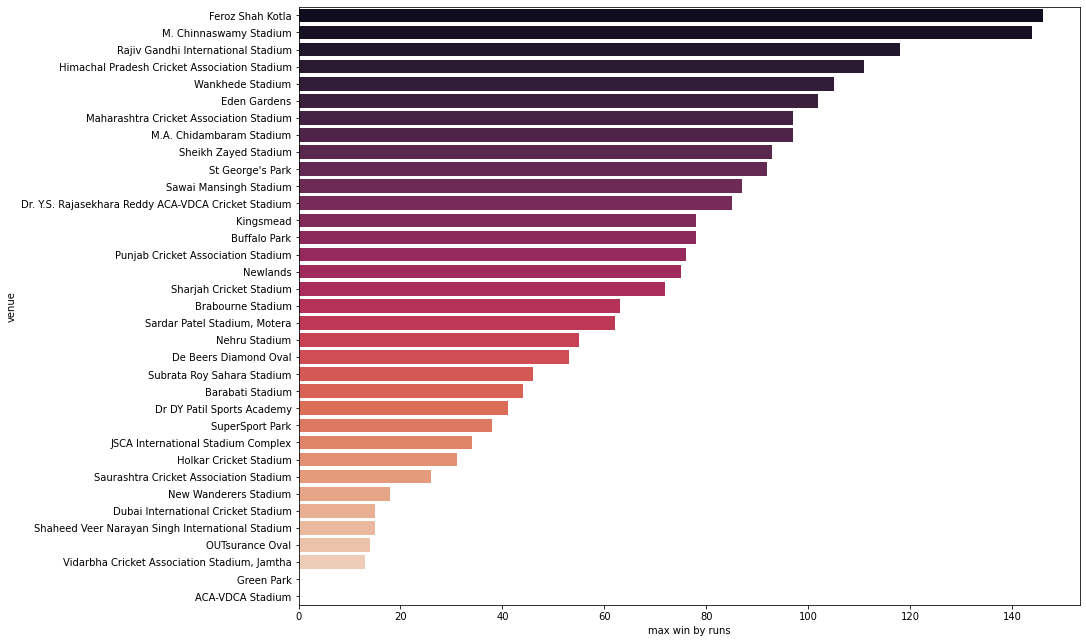

In [ ]:
sorted_combined_each_venue = combined_each_venue.sort_values(by="max win by runs", ascending=False)
plt.figure(figsize=(14,11))
sns.barplot(sorted_combined_each_venue["max win by runs"],sorted_combined_each_venue.index, palette="rocket")

**Barh plotting for WIN-BY-WICKETS**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



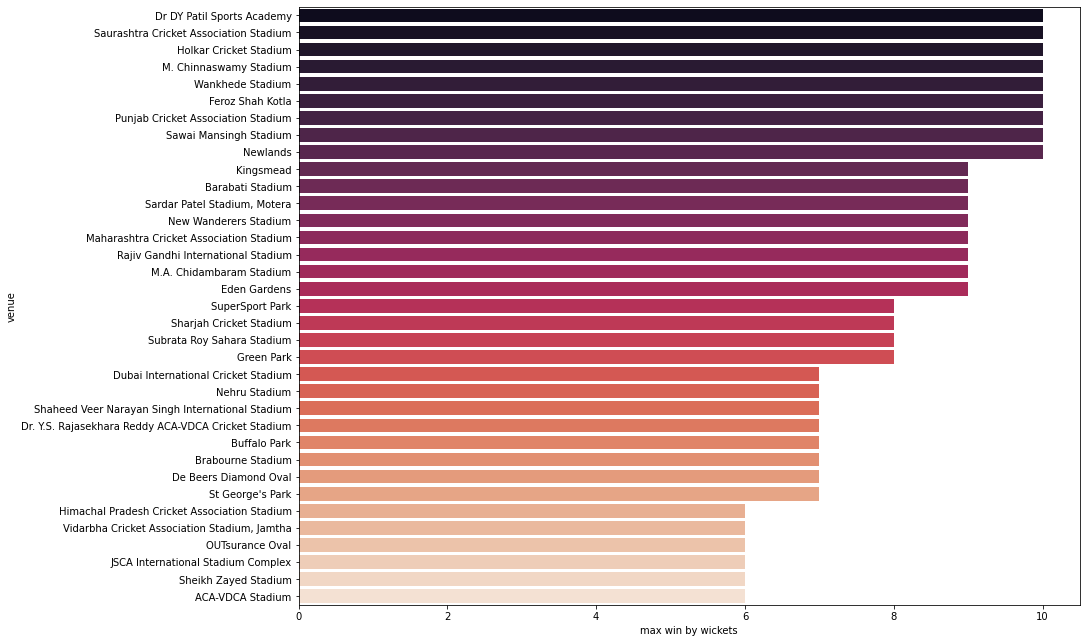

In [ ]:
sorted_combined_each_venue = combined_each_venue.sort_values(by="max win by wickets", ascending=False)
plt.figure(figsize=(14,11))
sns.barplot(sorted_combined_each_venue["max win by wickets"],sorted_combined_each_venue.index, palette="rocket")

#**Suggest Teams or Players a company should endorse for it's product** 

**My conclusion :**
>>>A company can suggest (ChennaiSuperKings or Bangalore)teams to endorse for it's products
 
**And Players as**

1. Ab De villiams(batsman,man_of_match)
2. Virat kohli(batsman,man_of_match)
3. GH Gayle(batsman,man_of_match)
4. SK Raina(batsman,man_of_match)
5. SR watson(batsman,man_of_match)
6. DA Warner(batsman,man_of_match)
7. Gambhir G(batsman,man_of_match)
8. DW Stevyn(Best Bowler)
9. NJ Rimmington(Best Bowler)
10. J-yadav(Best Bowler)